# Recommender

Recommends based on current shop performance

In [80]:
import pandas as pd
import ast # to convert to strings to list

In [62]:
transactions_df = pd.read_csv('../data/transactions.csv')
listings_df = pd.read_csv('../data/listings.csv')

# Good performing listings
lot of views and good conversions

# Under performing listings
lots of views BUT bad conversions
=> make better designs

# Over performing listings
little views BUT good conversions
=> make better tags, keywords, quality

# Bad performing listings
little views AND bad conversions
=> no action

# Best views tags
get average views for each tag / total number of views

# Best CTR tags
average ranking of 2 tags


<Axes: title={'center': 'Histogram of Views'}, ylabel='Frequency'>

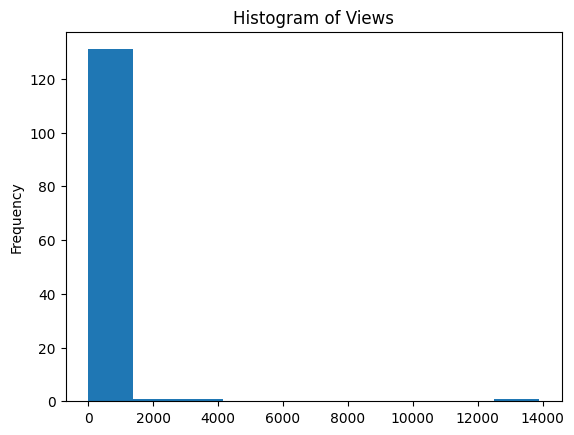

In [63]:
# Plot a histogram of the 'Views' column
listings_df.sort_values(by='views')['views'].plot(kind='hist', bins=10, title='Histogram of Views')

In [64]:
# Let's get the median number of views as a bench mark
views_25 = listings_df['views'].quantile(0.25)
views_50 = listings_df['views'].median()
views_75 = listings_df['views'].quantile(0.75)
print(views_25, views_50, views_75)

13.25 29.0 106.25


In [65]:
# Let's make a simpler df
listings_df['favorers over views'] = listings_df['num_favorers'] / listings_df['views']
listings2_df = listings_df[['title', 'views', 'num_favorers', 'favorers over views']]
listings2_df.sort_values(by='favorers over views', ascending=False, inplace=False).head(10)
# listings_df

,title,views,num_favorers,favorers over views
74,"Nuggs Not Drugs - Unhinged Shirt, Weirdcore sh...",3,4,1.333333
33,"Alcohol Abuser Funny Shirt | Whiskey Shirt, Wh...",5,3,0.600000
65,"I Love Me(n), Womens Funny T-shirts, Sarcastic...",6,3,0.500000
31,"Deadass Skeleton Shirt, Skeleton Shirt Oversiz...",2,1,0.500000
30,Did You Consult That Dog Within Meme Shirt | A...,8,3,0.375000
87,"Smile You&#39;re On Drugs Unisex Stoner Shirt,...",16,5,0.312500
114,"I take your fish, then I take your beach Unise...",8,2,0.250000
104,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,1,0.250000
70,"Zu Za Zaazu Emoji Mooning Unisex Shirt, Unhing...",8,2,0.250000
105,"Your Mom University Shirt, Mom Sweatshirt, Coo...",8,2,0.250000


In [66]:
# Good performing listings
# lot of views and good conversions
good_performing_df = listings2_df[listings2_df['views']>views_75].sort_values(by=['favorers over views'], ascending=False).head(10)
good_performing_df.head(10)

# Need to optimize price for if favorers. 

,title,views,num_favorers,favorers over views
94,"Minimum Wage, Maximum Rage Funny Skeleton Meme...",139,32,0.230216
14,i suffer from mental illinois Depressed Cat Ts...,228,32,0.140351
46,"She King on My Gizzard - Unhinged Shirt, Weird...",362,49,0.135359
39,Vintage 90s I Got That Dog In Me Unisex T-Shir...,164,22,0.134146
35,"Born to Dilly Dally, Forced to Lock In, Sad Ca...",121,16,0.132231
5,"Rippit - Funny Unisex Stoner T-Shirt, Frog Swe...",963,124,0.128764
2,"Autism Vintage T-Shirt, Retro Metal Shirt, Fun...",1554,199,0.128057
16,"War Cat in the Battlefield Unisex Shirt, Kitte...",668,84,0.125749
3,"They Don&#39;t Understand Alpha Wolf Shirt, Un...",608,70,0.115132
98,No Need To Get Aggressive Raccoon Shirt - Funn...,166,19,0.114458


In [67]:
# Under performing listings
# lots of views BUT bad conversions
# => make better designs
under_performing_df = listings2_df[listings2_df['views']>views_75].sort_values(by=['favorers over views'], ascending=True).head(10)
under_performing_df.head(10)

,title,views,num_favorers,favorers over views
43,"Fight or Flxight, Cute Penguin Shirt, Penguin ...",129,2,0.015504
76,"My Brain is Lacking, But My Ass is Packing, Fu...",175,3,0.017143
60,"Hoy Triste Cat Shirt - Latina Shirt, Funny Spa...",450,13,0.028889
55,"Fight or Flxight, Cute Penguin Sweatshirt, Kaw...",358,11,0.030726
95,"Fat Cat Unisex Sweater, Fat Cat, Chonky Cat, C...",159,5,0.031447
51,"Diabetes Conqueror Unisex Ironic Funny Shirt, ...",166,7,0.042169
45,"Yellowstone National Park Unisex Sweatshirt, C...",274,12,0.043796
4,"Capybara Bootleg Edit Unisex Shirt, Cute Capyb...",290,16,0.055172
12,Feminism Sigma Donkey Shirt - Funny Meme Shirt...,3452,193,0.055910
6,"Existence is Pain Au Chocolat, Life is Pain Au...",214,13,0.060748


In [68]:
# Over performing listings
# little views BUT good conversions
# => make better tags, keywords, quality
over_performing_df = listings2_df[listings2_df['views']<views_25].sort_values(by=['favorers over views'], ascending=False).head(10)
over_performing_df.head(10)

,title,views,num_favorers,favorers over views
74,"Nuggs Not Drugs - Unhinged Shirt, Weirdcore sh...",3,4,1.333333
33,"Alcohol Abuser Funny Shirt | Whiskey Shirt, Wh...",5,3,0.600000
31,"Deadass Skeleton Shirt, Skeleton Shirt Oversiz...",2,1,0.500000
65,"I Love Me(n), Womens Funny T-shirts, Sarcastic...",6,3,0.500000
30,Did You Consult That Dog Within Meme Shirt | A...,8,3,0.375000
105,"Your Mom University Shirt, Mom Sweatshirt, Coo...",8,2,0.250000
70,"Zu Za Zaazu Emoji Mooning Unisex Shirt, Unhing...",8,2,0.250000
114,"I take your fish, then I take your beach Unise...",8,2,0.250000
104,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,1,0.250000
28,"Feminism Gorilla T-Shirt | Funny Meme Shirt, F...",5,1,0.200000


In [ ]:
# Bad performing listings
# little views AND bad conversions
# => no action
bad_performing_df = listings2_df[listings2_df['views']<views_25].sort_values(by=['favorers over views'], ascending=True).head(10)
bad_performing_df.head(10)

,title,views,num_favorers,favorers over views
20,Acoustic Genius Sloth Shirt | Autism Cute Shirt,1,0,0.0
117,"Professional Catfisher T-Shirt, Cursed Fishing...",12,0,0.0
111,"Capy Valentines Day, Capybara Shirt, Capybara ...",13,0,0.0
109,"Professional Catfisher Sweater, Cute Fishing S...",9,0,0.0
108,"I&#39;m gonna eat you, Funny Shirt, Meme Sweat...",4,0,0.0
100,"Let&#39;s Get This Bread- Baker T-shirt, Cozy ...",12,0,0.0
99,"Ok I Pull Up Capybara Shirt, Capybara Graphic ...",4,0,0.0
97,"I Choo Choo Choose You Unisex Shirt, Cute Trai...",10,0,0.0
71,"Be Gay, Do Crime Unisex Sweatshirt, Funny Gay ...",1,0,0.0
68,"Be Gay Do Crime Unisex Shirt, Funny Y2K Gay Sh...",7,0,0.0


In [104]:
    # Best views tags
    # get average views for each tag / total number of views
def get_best_tags(metric, listings_df):
        """
        I want to make metric for best tag performance

        Input:
        metric: metric to determine the best tag (string). column_name in listings_df.
        listings_df: listing_df

        Output:
        tag_performance_df: df with tag column and performance value column

        """
        tag_count_dict = {} # Counter for tag count
        tag_views_dict = {} # Sum of tag views 
        avg_tag_views_dict = {} # Average tags views
        for row in range(listings_df.shape[0]):
            for tag in ast.literal_eval(listings_df['tags'][row]): # basically converting from string to actual list
                if tag in tag_count_dict:
                    tag_count_dict[tag] += 1
                    tag_views_dict[tag] += listings_df[metric][row]
                else:
                    tag_count_dict[tag] = 1
                    tag_views_dict[tag] = listings_df[metric][row]
                    
                avg_tag_views_dict[tag] = tag_views_dict[tag] / tag_count_dict[tag]
        # print(tag_dict)

        # Sort the dictionary by values in descending order
        sorted_dict = dict(sorted(avg_tag_views_dict.items(), key=lambda x: x[1], reverse=True))

        # Convert to a pandas DataFrame for a tabular display
        tag_performance_df = pd.DataFrame(list(sorted_dict.items()), columns=['Tag', 'Value'])

        return tag_performance_df

In [105]:
best_views_tags_df = get_best_tags('views', listings_df)
best_favorers_tags_df = get_best_tags('num_favorers', listings_df)

In [106]:
best_views_tags_df.head()

,Tag,Value
0,Gifts For Friends,13888.0
1,Funny Ironic Tshirt,13888.0
2,Cursed,7600.0
3,Stupid Shirt,7278.0
4,Funny Meme Shirt,7125.0


In [107]:
best_favorers_tags_df.head()

,Tag,Value
0,Gifts For Friends,1244.0
1,Funny Ironic Tshirt,1244.0
2,Cursed,685.0
3,Stupid Shirt,664.0
4,Funny Meme Shirt,646.5


Additional things to do.
1. Make a combined favorers and views metric to get a holistic view
2. Try to find a way to get click through rate. 

## Another part
currently the listings don't have the number of shirts sold per. Is there a way to add that in? 

1. listings_df left join to 